Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1-mesa-glx is already the newest version (23.0.4-0ubuntu1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Saving 1.png to 1 (2).png


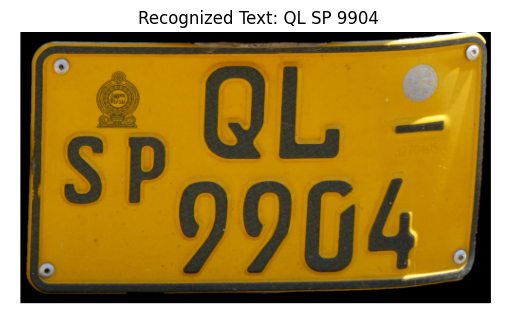

In [10]:
!pip install easyocr
!apt install -y libgl1-mesa-glx

from google.colab import files
import cv2
import easyocr
from matplotlib import pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def perform_ocr(image, reader):
    result = reader.readtext(image)
    return ' '.join(entry[1] for entry in result)

def display_image_with_results(image, recognized_text):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Recognized Text: {recognized_text}")
    plt.axis('off')
    plt.show()

def number_plate_recognition(image_path):
    preprocessed_image = preprocess_image(image_path)
    reader = easyocr.Reader(['en'])
    recognized_text = perform_ocr(preprocessed_image, reader)
    display_image_with_results(cv2.imread(image_path), recognized_text)

uploaded = files.upload()
for file_name in uploaded.keys():
    number_plate_recognition(file_name)
